## ML lab 03 - Linear Regression 의 cost 최소화의 TensorFlow 구현 (new)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# input data
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# hypothesis
hypothesis = X * W # b는 생략

# cost fucntion
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# make session
sess = tf.Session()

# varialbes_initializer
sess.run(tf.global_variables_initializer())

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


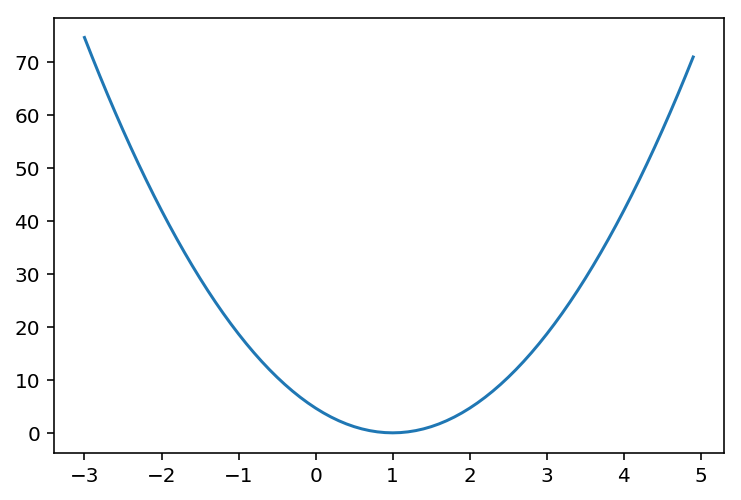

In [2]:
# W값, cost값을 저장할 list 생성
W_val = []
cost_val = []

# for문으로 값 도출
for i in range(-30, 50) :
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict = {W : feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)    

# plot
plt.plot(W_val, cost_val)
plt.show()

In [3]:
# Minimize : W -= learning_rate * derivative

# learning_rate = 0.1
# gradient = tf.reduce_mean((W * X - Y) * X)
# descent = W - learning_rate * gradient
# update = W.assign(descent)

In [4]:
# 전체 코드

# input data
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name = 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# hypothesis
hypothesis = X * W # b는 생략

# cost fucntion
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize : W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# launch
sess = tf.Session()

# initial
sess.run(tf.global_variables_initializer())

for step in range(21) :
    sess.run(update, feed_dict = {X : x_data, Y : y_data})
    print(step, sess.run(cost, feed_dict = {X : x_data, Y : y_data}), sess.run(W))

0 2.065524 [0.33470887]
1 0.5875268 [0.6451781]
2 0.16711877 [0.81076163]
3 0.047535986 [0.8990729]
4 0.013521367 [0.9461722]
5 0.003846069 [0.97129184]
6 0.0010939917 [0.984689]
7 0.00031118296 [0.9918341]
8 8.8512985e-05 [0.99564487]
9 2.5177365e-05 [0.99767727]
10 7.161014e-06 [0.99876124]
11 2.0368545e-06 [0.99933934]
12 5.792385e-07 [0.9996477]
13 1.6484431e-07 [0.99981207]
14 4.692889e-08 [0.99989974]
15 1.3346253e-08 [0.99994653]
16 3.7813237e-09 [0.9999715]
17 1.0762603e-09 [0.9999848]
18 3.066513e-10 [0.9999919]
19 8.887113e-11 [0.99999565]
20 2.4941235e-11 [0.9999977]


In [5]:
# 미분값을 표현하는 또다른 방법

# optimzer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
# train = optimizer.minimize(cost)

In [6]:
# 미분값을 표현하는 또다른 방법 : optimizer 적용

# input data
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.0)

# hypothesis
hypothesis = X * W # b는 생략

# cost fucntion
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize : optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

# make session
sess = tf.Session()

# varialbes_initializer
sess.run(tf.global_variables_initializer())

for step in range(10+1) :
    print(step, sess.run(W))
    sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0
